# Brahyan Avendaño Morales
Trabajo de sensores

# Análisis de expresión génica en monocitos de pacientes con cáncer de mama metastásico y sepsis. 
#Base de datos: (Cáncer de mama metastásico y sepsis: monocitos)


In [1]:
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import random
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix


In [2]:
filepath = "GSE65517_normalized.txt.gz"
df = pd.read_csv(filepath, sep="\t", compression="gzip" , skiprows=4, index_col=0, header=1 )
df.head(2)

,B.1,B.2,B.3,B.4,HC.1,HC.2,HC.3,S.1,S.2,S.3,T.1,T.2,T.3
ID_REF,,,,,,,,,,,,,
ILMN_1725881,10.479167,4.937500,16.8125,9.062500,1.854167,9.104167,15.104167,3.4375,8.270833,-3.145833,11.437500,14.020833,11.187500
ILMN_1910180,-0.687500,2.229167,-1.4375,23.270834,4.312500,3.270833,3.479167,-8.4375,-5.354166,-1.187500,2.895833,-3.687500,-3.354167


In [3]:
df.shape

(47332, 13)

In [4]:
# transponer la base de datos
df_T = df.transpose()

# guardar la base de datos transpuesta en un archivo csv
df_T.to_csv('archivo_transpuesto.csv', index=False)
df_T.head(13)

ID_REF,ILMN_1725881,ILMN_1910180,ILMN_1804174,ILMN_1796063,ILMN_3284771,ILMN_3208259,ILMN_1811966,ILMN_1668162,ILMN_1715600,ILMN_1912287,...,ILMN_3166640,ILMN_3166655,ILMN_3166673,ILMN_3166687,ILMN_3166703,ILMN_3166721,ILMN_3166728,ILMN_3166775,ILMN_3166789,ILMN_3166804
B.1,10.479167,-0.687500,16.854166,401.56250,0.354167,2.354167,9.562500,-7.645834,-7.645834,13.645833,...,3.187500,-3.604167,-5.645834,-4.562500,7.770834,-1.729167,-8.687500,-0.729167,-0.729167,1.312500
B.2,4.937500,2.229167,7.562500,416.60416,-2.895833,-0.354167,2.229167,-7.770834,-4.020834,15.687500,...,12.979167,0.854167,-6.604166,-4.104166,3.562500,-0.395833,-6.604166,-0.395833,-7.812500,3.562500
B.3,16.812500,-1.437500,1.145833,229.02083,-7.729166,3.770833,3.770833,5.104166,-9.979167,61.520832,...,-6.437500,-2.854167,-2.854167,1.104167,-0.312500,6.562500,1.104167,-11.187500,-0.312500,-1.479167
B.4,9.062500,23.270834,31.895834,466.81250,-7.520834,-4.229166,16.979166,-11.187500,10.187500,27.229166,...,-0.604167,5.395834,-9.812500,-1.854167,5.395834,-1.854167,-7.562500,-3.020833,-3.020833,-0.604167
HC.1,1.854167,4.312500,0.187500,473.22916,-5.937500,-3.229167,30.229166,-0.812500,13.729167,5.187500,...,0.979167,-2.395833,-2.395833,-2.395833,-6.812500,6.770834,-2.395833,-6.812500,6.770834,-6.812500
HC.2,9.104167,3.270833,40.145832,309.27084,-4.895834,0.395833,16.354166,-10.187500,-3.270833,10.645833,...,9.770833,-8.437500,-10.229167,2.729167,-2.604167,1.229167,-4.937500,-1.062500,-3.312500,1.979167
HC.3,15.104167,3.479167,29.187500,536.47920,-0.979167,-6.479166,7.895834,-0.145833,-3.312500,-0.145833,...,7.854166,-4.312500,-1.020833,1.270833,1.270833,9.312500,-7.479166,-3.354167,-3.354167,-0.187500
S.1,3.437500,-8.437500,13.187500,212.52083,-2.770833,-9.520833,22.604166,-7.270834,-1.354167,38.729168,...,17.562500,-3.895833,-3.895833,2.145833,3.395833,-6.145834,-0.229167,-2.812500,-3.895833,8.812500
S.2,8.270833,-5.354166,9.145833,530.93750,-2.604167,-4.395834,8.270833,-3.395833,-4.395834,61.770832,...,4.937500,-7.187500,-5.395834,-3.437500,-2.645833,-3.437500,-9.312500,-5.395834,-1.770833,5.770834
S.3,-3.145833,-1.187500,18.645834,388.18750,-1.187500,-1.187500,2.604167,-9.812500,8.354167,37.854168,...,-0.437500,-9.854167,-6.104166,-7.062500,-1.229167,-3.187500,-0.437500,3.604167,-5.145834,-5.145834


# Nuevo Target

In [5]:
df_T['ESTADO'] = ['metastatic_breast_cancer', 'metastatic_breast_cancer', 'metastatic_breast_cancer', 
          'metastatic_breast_cancer', 'healthy_control', 'healthy_control', 'healthy_control', 
          'gram_negative_sepsis', 'gram_negative_sepsis', 'gram_negative_sepsis', 'tuberculosis', 
          'tuberculosis', 'tuberculosis']

#df_T['ESTADO'] = estado
# Primary human monocytes from patient with metastatic breast cancer:B1, B2, B3, B4
# Primary human monocytes from healthy control: H1,H2, H3
# Primary human monocytes from patient with gram-negative sepsis: S1,S2, S3
# Primary human monocytes from patient with tuberculosis:T1, T2, T3
df_T.head(13)

ID_REF,ILMN_1725881,ILMN_1910180,ILMN_1804174,ILMN_1796063,ILMN_3284771,ILMN_3208259,ILMN_1811966,ILMN_1668162,ILMN_1715600,ILMN_1912287,...,ILMN_3166655,ILMN_3166673,ILMN_3166687,ILMN_3166703,ILMN_3166721,ILMN_3166728,ILMN_3166775,ILMN_3166789,ILMN_3166804,ESTADO
B.1,10.479167,-0.687500,16.854166,401.56250,0.354167,2.354167,9.562500,-7.645834,-7.645834,13.645833,...,-3.604167,-5.645834,-4.562500,7.770834,-1.729167,-8.687500,-0.729167,-0.729167,1.312500,metastatic_breast_cancer
B.2,4.937500,2.229167,7.562500,416.60416,-2.895833,-0.354167,2.229167,-7.770834,-4.020834,15.687500,...,0.854167,-6.604166,-4.104166,3.562500,-0.395833,-6.604166,-0.395833,-7.812500,3.562500,metastatic_breast_cancer
B.3,16.812500,-1.437500,1.145833,229.02083,-7.729166,3.770833,3.770833,5.104166,-9.979167,61.520832,...,-2.854167,-2.854167,1.104167,-0.312500,6.562500,1.104167,-11.187500,-0.312500,-1.479167,metastatic_breast_cancer
B.4,9.062500,23.270834,31.895834,466.81250,-7.520834,-4.229166,16.979166,-11.187500,10.187500,27.229166,...,5.395834,-9.812500,-1.854167,5.395834,-1.854167,-7.562500,-3.020833,-3.020833,-0.604167,metastatic_breast_cancer
HC.1,1.854167,4.312500,0.187500,473.22916,-5.937500,-3.229167,30.229166,-0.812500,13.729167,5.187500,...,-2.395833,-2.395833,-2.395833,-6.812500,6.770834,-2.395833,-6.812500,6.770834,-6.812500,healthy_control
HC.2,9.104167,3.270833,40.145832,309.27084,-4.895834,0.395833,16.354166,-10.187500,-3.270833,10.645833,...,-8.437500,-10.229167,2.729167,-2.604167,1.229167,-4.937500,-1.062500,-3.312500,1.979167,healthy_control
HC.3,15.104167,3.479167,29.187500,536.47920,-0.979167,-6.479166,7.895834,-0.145833,-3.312500,-0.145833,...,-4.312500,-1.020833,1.270833,1.270833,9.312500,-7.479166,-3.354167,-3.354167,-0.187500,healthy_control
S.1,3.437500,-8.437500,13.187500,212.52083,-2.770833,-9.520833,22.604166,-7.270834,-1.354167,38.729168,...,-3.895833,-3.895833,2.145833,3.395833,-6.145834,-0.229167,-2.812500,-3.895833,8.812500,gram_negative_sepsis
S.2,8.270833,-5.354166,9.145833,530.93750,-2.604167,-4.395834,8.270833,-3.395833,-4.395834,61.770832,...,-7.187500,-5.395834,-3.437500,-2.645833,-3.437500,-9.312500,-5.395834,-1.770833,5.770834,gram_negative_sepsis
S.3,-3.145833,-1.187500,18.645834,388.18750,-1.187500,-1.187500,2.604167,-9.812500,8.354167,37.854168,...,-9.854167,-6.104166,-7.062500,-1.229167,-3.187500,-0.437500,3.604167,-5.145834,-5.145834,gram_negative_sepsis


In [6]:
# Primero tenemos que generar el objeto
codificacion = LabelEncoder()
# Ahora se ajusta a los datos
df_T['ESTADO']=codificacion.fit_transform(df_T['ESTADO'])

In [7]:
df_T.head(13)

ID_REF,ILMN_1725881,ILMN_1910180,ILMN_1804174,ILMN_1796063,ILMN_3284771,ILMN_3208259,ILMN_1811966,ILMN_1668162,ILMN_1715600,ILMN_1912287,...,ILMN_3166655,ILMN_3166673,ILMN_3166687,ILMN_3166703,ILMN_3166721,ILMN_3166728,ILMN_3166775,ILMN_3166789,ILMN_3166804,ESTADO
B.1,10.479167,-0.687500,16.854166,401.56250,0.354167,2.354167,9.562500,-7.645834,-7.645834,13.645833,...,-3.604167,-5.645834,-4.562500,7.770834,-1.729167,-8.687500,-0.729167,-0.729167,1.312500,2
B.2,4.937500,2.229167,7.562500,416.60416,-2.895833,-0.354167,2.229167,-7.770834,-4.020834,15.687500,...,0.854167,-6.604166,-4.104166,3.562500,-0.395833,-6.604166,-0.395833,-7.812500,3.562500,2
B.3,16.812500,-1.437500,1.145833,229.02083,-7.729166,3.770833,3.770833,5.104166,-9.979167,61.520832,...,-2.854167,-2.854167,1.104167,-0.312500,6.562500,1.104167,-11.187500,-0.312500,-1.479167,2
B.4,9.062500,23.270834,31.895834,466.81250,-7.520834,-4.229166,16.979166,-11.187500,10.187500,27.229166,...,5.395834,-9.812500,-1.854167,5.395834,-1.854167,-7.562500,-3.020833,-3.020833,-0.604167,2
HC.1,1.854167,4.312500,0.187500,473.22916,-5.937500,-3.229167,30.229166,-0.812500,13.729167,5.187500,...,-2.395833,-2.395833,-2.395833,-6.812500,6.770834,-2.395833,-6.812500,6.770834,-6.812500,1
HC.2,9.104167,3.270833,40.145832,309.27084,-4.895834,0.395833,16.354166,-10.187500,-3.270833,10.645833,...,-8.437500,-10.229167,2.729167,-2.604167,1.229167,-4.937500,-1.062500,-3.312500,1.979167,1
HC.3,15.104167,3.479167,29.187500,536.47920,-0.979167,-6.479166,7.895834,-0.145833,-3.312500,-0.145833,...,-4.312500,-1.020833,1.270833,1.270833,9.312500,-7.479166,-3.354167,-3.354167,-0.187500,1
S.1,3.437500,-8.437500,13.187500,212.52083,-2.770833,-9.520833,22.604166,-7.270834,-1.354167,38.729168,...,-3.895833,-3.895833,2.145833,3.395833,-6.145834,-0.229167,-2.812500,-3.895833,8.812500,0
S.2,8.270833,-5.354166,9.145833,530.93750,-2.604167,-4.395834,8.270833,-3.395833,-4.395834,61.770832,...,-7.187500,-5.395834,-3.437500,-2.645833,-3.437500,-9.312500,-5.395834,-1.770833,5.770834,0
S.3,-3.145833,-1.187500,18.645834,388.18750,-1.187500,-1.187500,2.604167,-9.812500,8.354167,37.854168,...,-9.854167,-6.104166,-7.062500,-1.229167,-3.187500,-0.437500,3.604167,-5.145834,-5.145834,0


In [8]:
# Se selecciona la variable objetivo, en este caso "ESTADO".

target=df_T['ESTADO']
# guardar la base de datos transpuesta en un archivo csv
target.to_csv('target.csv', index=False)
# Del conjunto de datos se elimina la variable "ESTADO".


In [9]:
df_T=df_T.drop(['ESTADO'], axis=1)
df_T.head(13)

ID_REF,ILMN_1725881,ILMN_1910180,ILMN_1804174,ILMN_1796063,ILMN_3284771,ILMN_3208259,ILMN_1811966,ILMN_1668162,ILMN_1715600,ILMN_1912287,...,ILMN_3166640,ILMN_3166655,ILMN_3166673,ILMN_3166687,ILMN_3166703,ILMN_3166721,ILMN_3166728,ILMN_3166775,ILMN_3166789,ILMN_3166804
B.1,10.479167,-0.687500,16.854166,401.56250,0.354167,2.354167,9.562500,-7.645834,-7.645834,13.645833,...,3.187500,-3.604167,-5.645834,-4.562500,7.770834,-1.729167,-8.687500,-0.729167,-0.729167,1.312500
B.2,4.937500,2.229167,7.562500,416.60416,-2.895833,-0.354167,2.229167,-7.770834,-4.020834,15.687500,...,12.979167,0.854167,-6.604166,-4.104166,3.562500,-0.395833,-6.604166,-0.395833,-7.812500,3.562500
B.3,16.812500,-1.437500,1.145833,229.02083,-7.729166,3.770833,3.770833,5.104166,-9.979167,61.520832,...,-6.437500,-2.854167,-2.854167,1.104167,-0.312500,6.562500,1.104167,-11.187500,-0.312500,-1.479167
B.4,9.062500,23.270834,31.895834,466.81250,-7.520834,-4.229166,16.979166,-11.187500,10.187500,27.229166,...,-0.604167,5.395834,-9.812500,-1.854167,5.395834,-1.854167,-7.562500,-3.020833,-3.020833,-0.604167
HC.1,1.854167,4.312500,0.187500,473.22916,-5.937500,-3.229167,30.229166,-0.812500,13.729167,5.187500,...,0.979167,-2.395833,-2.395833,-2.395833,-6.812500,6.770834,-2.395833,-6.812500,6.770834,-6.812500
HC.2,9.104167,3.270833,40.145832,309.27084,-4.895834,0.395833,16.354166,-10.187500,-3.270833,10.645833,...,9.770833,-8.437500,-10.229167,2.729167,-2.604167,1.229167,-4.937500,-1.062500,-3.312500,1.979167
HC.3,15.104167,3.479167,29.187500,536.47920,-0.979167,-6.479166,7.895834,-0.145833,-3.312500,-0.145833,...,7.854166,-4.312500,-1.020833,1.270833,1.270833,9.312500,-7.479166,-3.354167,-3.354167,-0.187500
S.1,3.437500,-8.437500,13.187500,212.52083,-2.770833,-9.520833,22.604166,-7.270834,-1.354167,38.729168,...,17.562500,-3.895833,-3.895833,2.145833,3.395833,-6.145834,-0.229167,-2.812500,-3.895833,8.812500
S.2,8.270833,-5.354166,9.145833,530.93750,-2.604167,-4.395834,8.270833,-3.395833,-4.395834,61.770832,...,4.937500,-7.187500,-5.395834,-3.437500,-2.645833,-3.437500,-9.312500,-5.395834,-1.770833,5.770834
S.3,-3.145833,-1.187500,18.645834,388.18750,-1.187500,-1.187500,2.604167,-9.812500,8.354167,37.854168,...,-0.437500,-9.854167,-6.104166,-7.062500,-1.229167,-3.187500,-0.437500,3.604167,-5.145834,-5.145834


# Varianza


In [10]:
# Calcular la varianza de cada columna
varianza = df_T.var(numeric_only=True)
# Establecer un umbral para la varianza mínima
umbral = 1000

# Filtrar las columnas que tienen una varianza mayor o igual al umbral establecido
cols_filtradas = varianza[varianza >= umbral].index

# Actualizar el dataframe solo con las columnas filtradas
df_T = df_T.loc[:,cols_filtradas]

In [11]:
df_T.head(13)

ID_REF,ILMN_1796063,ILMN_1793729,ILMN_1655444,ILMN_1711453,ILMN_1660232,ILMN_1763663,ILMN_1775074,ILMN_1809344,ILMN_1762281,ILMN_1734742,...,ILMN_1761281,ILMN_2051684,ILMN_2387952,ILMN_1742577,ILMN_3243700,ILMN_1678522,ILMN_1738523,ILMN_2149766,ILMN_1720233,ILMN_1791388
B.1,401.56250,544.81250,103.229164,57.312500,286.64584,146.604170,153.10417,140.770830,472.89584,647.47920,...,50.145832,362.60416,81.145836,484.437500,4329.9375,1689.47910,871.97920,174.395830,201.812500,377.39584
B.2,416.60416,475.72916,105.395836,61.562500,290.22916,202.520830,186.68750,94.937500,596.72920,545.68750,...,65.770836,480.35416,56.354168,346.312500,4254.6040,3043.97920,537.52080,197.687500,141.895830,265.35416
B.3,229.02083,940.89580,55.937500,61.520832,145.56250,5.104166,162.27083,335.187500,674.64580,464.14584,...,3.687500,724.97920,39.020832,109.729164,2436.8125,330.89584,861.60420,44.270832,395.479160,795.56250
B.4,466.81250,782.06250,107.562500,47.604168,244.89583,247.270830,171.35417,40.562500,550.18750,915.31250,...,88.229164,373.31250,104.687500,435.854160,5167.8540,890.27080,466.68750,134.604170,167.979170,370.81250
HC.1,473.22916,528.52080,170.312500,140.979170,251.68750,218.687500,166.72917,98.979164,630.93750,662.39580,...,31.187500,487.97916,7.562500,404.687500,6221.1040,836.85420,417.02084,54.937500,417.312500,330.35416
HC.2,309.27084,382.39584,135.062500,72.104164,231.56250,225.979170,156.89583,72.145836,494.18750,550.18750,...,17.104166,366.60416,12.520833,475.395840,5468.8125,1627.60410,326.77084,106.020836,631.770800,401.02084
HC.3,536.47920,1217.27090,54.062500,43.729168,314.81250,148.270830,311.39584,60.604168,623.81250,961.52080,...,12.395833,367.22916,28.145834,631.770800,6296.0625,899.18750,399.27084,38.854168,475.895840,477.85416
S.1,212.52083,887.89580,211.604170,7.479166,324.64584,78.020836,184.81250,98.562500,485.64584,835.31250,...,161.687500,763.27080,95.479164,379.437500,2957.6875,1118.47910,889.14580,91.770836,399.604160,635.47920
S.2,530.93750,536.72920,102.104164,107.895836,257.31250,157.229170,153.89583,106.104164,498.47916,744.81250,...,44.479168,457.89584,33.062500,364.979160,5213.2710,2793.60420,526.72920,189.770830,187.562500,317.22916
S.3,388.18750,503.97916,84.270836,17.854166,354.89584,146.104170,251.31250,91.479164,587.02080,921.31250,...,157.520830,350.14584,124.104164,385.729160,4858.2710,1895.81250,806.31250,150.937500,86.729164,381.89584


In [12]:
print(varianza)

ID_REF
ILMN_1725881       31.790042
ILMN_1910180       58.908901
ILMN_1804174      193.276489
ILMN_1796063    13679.923009
ILMN_3284771        7.836917
                    ...     
ILMN_3166721       27.974982
ILMN_3166728       11.850561
ILMN_3166775       14.753317
ILMN_3166789       12.113604
ILMN_3166804       20.251892
Length: 47332, dtype: float64


In [13]:
print(varianza.mean())
# inicialwmnte son 47332, si utilizo un umbral de 10000 queda en 4369, y si utilizo uno de 1000 queda en 8658

111484.76737880803


## Autoencoder 

In [14]:
#normalizar datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(df_T)
#datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
#arquitectura del autoencoder
#Las capas de codificación tienen tamaños
from keras.layers import Input, Dense, Dropout
from keras.models import Model

input_data = Input(shape=(8658,))
encoded = Dense(4096, activation='relu')(input_data)
encoded = Dense(2048, activation='relu')(encoded)
encoded = Dense(1024, activation='relu')(encoded)
encoded = Dense(512, activation='relu')(encoded)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='linear')(encoded)

decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(1024, activation='relu')(decoded)
decoded = Dense(2048, activation='relu')(decoded)
decoded = Dense(4096, activation='relu')(decoded)
decoded = Dense(8658, activation='linear')(decoded)
decoded= Dropout(0.05)(decoded)  #se hace por sobre ajuste
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics = ['MeanAbsolutePercentageError','RootMeanSquaredError'])

In [15]:
#Entrenamiento
hist=autoencoder.fit(train_data, train_data, epochs=1000, batch_size=32, shuffle=True, validation_data=(test_data, test_data))

Epoch 1/1000
1/1 [==============================] - 6s 6s/step - loss: 0.2724 - mean_absolute_percentage_error: 1003914.6250 - root_mean_squared_error: 0.5219 - val_loss: 0.2273 - val_mean_absolute_percentage_error: 4799589.5000 - val_root_mean_squared_error: 0.4768
Epoch 2/1000
1/1 [==============================] - 2s 2s/step - loss: 0.2221 - mean_absolute_percentage_error: 5338622.5000 - root_mean_squared_error: 0.4713 - val_loss: 106.1015 - val_mean_absolute_percentage_error: 631600576.0000 - val_root_mean_squared_error: 10.3006
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - loss: 104.5636 - mean_absolute_percentage_error: 757526400.0000 - root_mean_squared_error: 10.2256 - val_loss: 0.1939 - val_mean_absolute_percentage_error: 7945377.5000 - val_root_mean_squared_error: 0.4404
Epoch 4/1000
1/1 [==============================] - 2s 2s/step - loss: 0.1916 - mean_absolute_percentage_error: 8515316.0000 - root_mean_squared_error: 0.4377 - val_loss: 0.2799 - val_mean_

1/1 [==============================] - 2s 2s/step - loss: 0.0667 - mean_absolute_percentage_error: 23366866.0000 - root_mean_squared_error: 0.2583 - val_loss: 0.0710 - val_mean_absolute_percentage_error: 22777498.0000 - val_root_mean_squared_error: 0.2665
Epoch 32/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0644 - mean_absolute_percentage_error: 19141214.0000 - root_mean_squared_error: 0.2537 - val_loss: 0.0721 - val_mean_absolute_percentage_error: 20460290.0000 - val_root_mean_squared_error: 0.2686
Epoch 33/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0625 - mean_absolute_percentage_error: 15736427.0000 - root_mean_squared_error: 0.2499 - val_loss: 0.0714 - val_mean_absolute_percentage_error: 22556570.0000 - val_root_mean_squared_error: 0.2671
Epoch 34/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0688 - mean_absolute_percentage_error: 18016276.0000 - root_mean_squared_error: 0.2623 - val_loss: 0.0729 - val_mean_absolute_perc

1/1 [==============================] - 2s 2s/step - loss: 0.0495 - mean_absolute_percentage_error: 12101861.0000 - root_mean_squared_error: 0.2226 - val_loss: 0.0720 - val_mean_absolute_percentage_error: 21336286.0000 - val_root_mean_squared_error: 0.2683
Epoch 62/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0499 - mean_absolute_percentage_error: 10639317.0000 - root_mean_squared_error: 0.2235 - val_loss: 0.0711 - val_mean_absolute_percentage_error: 21367366.0000 - val_root_mean_squared_error: 0.2666
Epoch 63/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0498 - mean_absolute_percentage_error: 11403171.0000 - root_mean_squared_error: 0.2233 - val_loss: 0.0701 - val_mean_absolute_percentage_error: 23636360.0000 - val_root_mean_squared_error: 0.2647
Epoch 64/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0498 - mean_absolute_percentage_error: 12332691.0000 - root_mean_squared_error: 0.2232 - val_loss: 0.0708 - val_mean_absolute_perc

1/1 [==============================] - 2s 2s/step - loss: 0.0608 - mean_absolute_percentage_error: 10251176.0000 - root_mean_squared_error: 0.2466 - val_loss: 0.0694 - val_mean_absolute_percentage_error: 22838746.0000 - val_root_mean_squared_error: 0.2634
Epoch 92/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0549 - mean_absolute_percentage_error: 14120565.0000 - root_mean_squared_error: 0.2342 - val_loss: 0.0661 - val_mean_absolute_percentage_error: 21408514.0000 - val_root_mean_squared_error: 0.2571
Epoch 93/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0567 - mean_absolute_percentage_error: 17716636.0000 - root_mean_squared_error: 0.2381 - val_loss: 0.0788 - val_mean_absolute_percentage_error: 20218904.0000 - val_root_mean_squared_error: 0.2807
Epoch 94/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0503 - mean_absolute_percentage_error: 10637861.0000 - root_mean_squared_error: 0.2244 - val_loss: 0.0728 - val_mean_absolute_perc

1/1 [==============================] - 2s 2s/step - loss: 0.0412 - mean_absolute_percentage_error: 8643824.0000 - root_mean_squared_error: 0.2031 - val_loss: 0.0655 - val_mean_absolute_percentage_error: 17029944.0000 - val_root_mean_squared_error: 0.2560
Epoch 122/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0417 - mean_absolute_percentage_error: 6249092.5000 - root_mean_squared_error: 0.2041 - val_loss: 0.0617 - val_mean_absolute_percentage_error: 18725130.0000 - val_root_mean_squared_error: 0.2484
Epoch 123/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0388 - mean_absolute_percentage_error: 6796825.5000 - root_mean_squared_error: 0.1970 - val_loss: 0.0644 - val_mean_absolute_percentage_error: 20474042.0000 - val_root_mean_squared_error: 0.2537
Epoch 124/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0400 - mean_absolute_percentage_error: 7902593.5000 - root_mean_squared_error: 0.2000 - val_loss: 0.0674 - val_mean_absolute_perce

1/1 [==============================] - 2s 2s/step - loss: 0.0316 - mean_absolute_percentage_error: 6132691.5000 - root_mean_squared_error: 0.1779 - val_loss: 0.0629 - val_mean_absolute_percentage_error: 18692332.0000 - val_root_mean_squared_error: 0.2507
Epoch 152/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0315 - mean_absolute_percentage_error: 5871704.5000 - root_mean_squared_error: 0.1774 - val_loss: 0.0627 - val_mean_absolute_percentage_error: 18214962.0000 - val_root_mean_squared_error: 0.2505
Epoch 153/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0317 - mean_absolute_percentage_error: 5772836.5000 - root_mean_squared_error: 0.1780 - val_loss: 0.0621 - val_mean_absolute_percentage_error: 18161962.0000 - val_root_mean_squared_error: 0.2492
Epoch 154/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0313 - mean_absolute_percentage_error: 5953736.0000 - root_mean_squared_error: 0.1768 - val_loss: 0.0624 - val_mean_absolute_perce

1/1 [==============================] - 2s 2s/step - loss: 0.0376 - mean_absolute_percentage_error: 6071516.5000 - root_mean_squared_error: 0.1938 - val_loss: 0.0675 - val_mean_absolute_percentage_error: 17329250.0000 - val_root_mean_squared_error: 0.2598
Epoch 182/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0331 - mean_absolute_percentage_error: 6254555.0000 - root_mean_squared_error: 0.1820 - val_loss: 0.0694 - val_mean_absolute_percentage_error: 21816078.0000 - val_root_mean_squared_error: 0.2635
Epoch 183/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0372 - mean_absolute_percentage_error: 8562254.0000 - root_mean_squared_error: 0.1928 - val_loss: 0.0633 - val_mean_absolute_percentage_error: 17889694.0000 - val_root_mean_squared_error: 0.2515
Epoch 184/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0318 - mean_absolute_percentage_error: 6010587.5000 - root_mean_squared_error: 0.1782 - val_loss: 0.0756 - val_mean_absolute_perce

1/1 [==============================] - 2s 2s/step - loss: 0.0533 - mean_absolute_percentage_error: 12274106.0000 - root_mean_squared_error: 0.2309 - val_loss: 0.0706 - val_mean_absolute_percentage_error: 24061758.0000 - val_root_mean_squared_error: 0.2657
Epoch 212/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0526 - mean_absolute_percentage_error: 11675742.0000 - root_mean_squared_error: 0.2293 - val_loss: 0.0689 - val_mean_absolute_percentage_error: 21460310.0000 - val_root_mean_squared_error: 0.2625
Epoch 213/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0503 - mean_absolute_percentage_error: 10156613.0000 - root_mean_squared_error: 0.2243 - val_loss: 0.0644 - val_mean_absolute_percentage_error: 24133024.0000 - val_root_mean_squared_error: 0.2538
Epoch 214/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0486 - mean_absolute_percentage_error: 10921826.0000 - root_mean_squared_error: 0.2205 - val_loss: 0.0618 - val_mean_absolute_p

1/1 [==============================] - 2s 2s/step - loss: 0.0312 - mean_absolute_percentage_error: 5913462.5000 - root_mean_squared_error: 0.1765 - val_loss: 0.0611 - val_mean_absolute_percentage_error: 17582306.0000 - val_root_mean_squared_error: 0.2471
Epoch 242/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0314 - mean_absolute_percentage_error: 5723411.0000 - root_mean_squared_error: 0.1772 - val_loss: 0.0618 - val_mean_absolute_percentage_error: 17056004.0000 - val_root_mean_squared_error: 0.2486
Epoch 243/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0310 - mean_absolute_percentage_error: 5843428.0000 - root_mean_squared_error: 0.1760 - val_loss: 0.0611 - val_mean_absolute_percentage_error: 17434814.0000 - val_root_mean_squared_error: 0.2473
Epoch 244/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0308 - mean_absolute_percentage_error: 5883899.0000 - root_mean_squared_error: 0.1755 - val_loss: 0.0611 - val_mean_absolute_perce

1/1 [==============================] - 2s 2s/step - loss: 0.0249 - mean_absolute_percentage_error: 3785695.2500 - root_mean_squared_error: 0.1577 - val_loss: 0.0624 - val_mean_absolute_percentage_error: 16941966.0000 - val_root_mean_squared_error: 0.2498
Epoch 272/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0257 - mean_absolute_percentage_error: 3798080.5000 - root_mean_squared_error: 0.1603 - val_loss: 0.0608 - val_mean_absolute_percentage_error: 19324556.0000 - val_root_mean_squared_error: 0.2465
Epoch 273/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0259 - mean_absolute_percentage_error: 3842794.0000 - root_mean_squared_error: 0.1608 - val_loss: 0.0602 - val_mean_absolute_percentage_error: 17726354.0000 - val_root_mean_squared_error: 0.2453
Epoch 274/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0247 - mean_absolute_percentage_error: 3409622.7500 - root_mean_squared_error: 0.1571 - val_loss: 0.0644 - val_mean_absolute_perce

1/1 [==============================] - 2s 2s/step - loss: 0.0205 - mean_absolute_percentage_error: 2417878.7500 - root_mean_squared_error: 0.1433 - val_loss: 0.0698 - val_mean_absolute_percentage_error: 19555382.0000 - val_root_mean_squared_error: 0.2642
Epoch 302/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0196 - mean_absolute_percentage_error: 2383701.2500 - root_mean_squared_error: 0.1402 - val_loss: 0.0659 - val_mean_absolute_percentage_error: 20225494.0000 - val_root_mean_squared_error: 0.2567
Epoch 303/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0207 - mean_absolute_percentage_error: 2408673.2500 - root_mean_squared_error: 0.1440 - val_loss: 0.0698 - val_mean_absolute_percentage_error: 19362726.0000 - val_root_mean_squared_error: 0.2642
Epoch 304/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0199 - mean_absolute_percentage_error: 2206326.0000 - root_mean_squared_error: 0.1410 - val_loss: 0.0686 - val_mean_absolute_perce

1/1 [==============================] - 2s 2s/step - loss: 0.0273 - mean_absolute_percentage_error: 4746061.0000 - root_mean_squared_error: 0.1652 - val_loss: 0.0637 - val_mean_absolute_percentage_error: 17048392.0000 - val_root_mean_squared_error: 0.2524
Epoch 332/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0273 - mean_absolute_percentage_error: 4451963.5000 - root_mean_squared_error: 0.1651 - val_loss: 0.0631 - val_mean_absolute_percentage_error: 18176256.0000 - val_root_mean_squared_error: 0.2512
Epoch 333/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0261 - mean_absolute_percentage_error: 4591280.0000 - root_mean_squared_error: 0.1615 - val_loss: 0.0635 - val_mean_absolute_percentage_error: 19557170.0000 - val_root_mean_squared_error: 0.2519
Epoch 334/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0251 - mean_absolute_percentage_error: 4690218.5000 - root_mean_squared_error: 0.1584 - val_loss: 0.0643 - val_mean_absolute_perce

1/1 [==============================] - 2s 2s/step - loss: 0.0177 - mean_absolute_percentage_error: 1758402.0000 - root_mean_squared_error: 0.1329 - val_loss: 0.0702 - val_mean_absolute_percentage_error: 22105280.0000 - val_root_mean_squared_error: 0.2650
Epoch 362/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0169 - mean_absolute_percentage_error: 1687183.2500 - root_mean_squared_error: 0.1301 - val_loss: 0.0703 - val_mean_absolute_percentage_error: 22038206.0000 - val_root_mean_squared_error: 0.2652
Epoch 363/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0168 - mean_absolute_percentage_error: 1636499.2500 - root_mean_squared_error: 0.1296 - val_loss: 0.0703 - val_mean_absolute_percentage_error: 21989118.0000 - val_root_mean_squared_error: 0.2652
Epoch 364/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0167 - mean_absolute_percentage_error: 1517097.2500 - root_mean_squared_error: 0.1293 - val_loss: 0.0704 - val_mean_absolute_perce

1/1 [==============================] - 2s 2s/step - loss: 0.0143 - mean_absolute_percentage_error: 596504.8125 - root_mean_squared_error: 0.1197 - val_loss: 0.0767 - val_mean_absolute_percentage_error: 23428286.0000 - val_root_mean_squared_error: 0.2769
Epoch 392/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0145 - mean_absolute_percentage_error: 634228.1250 - root_mean_squared_error: 0.1205 - val_loss: 0.0760 - val_mean_absolute_percentage_error: 22831898.0000 - val_root_mean_squared_error: 0.2758
Epoch 393/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0139 - mean_absolute_percentage_error: 501298.6875 - root_mean_squared_error: 0.1180 - val_loss: 0.0759 - val_mean_absolute_percentage_error: 22625322.0000 - val_root_mean_squared_error: 0.2756
Epoch 394/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0139 - mean_absolute_percentage_error: 521135.5000 - root_mean_squared_error: 0.1177 - val_loss: 0.0777 - val_mean_absolute_percentag

1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 152194.0781 - root_mean_squared_error: 0.1156 - val_loss: 0.0777 - val_mean_absolute_percentage_error: 23055378.0000 - val_root_mean_squared_error: 0.2788
Epoch 422/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0133 - mean_absolute_percentage_error: 138959.5938 - root_mean_squared_error: 0.1153 - val_loss: 0.0775 - val_mean_absolute_percentage_error: 23043512.0000 - val_root_mean_squared_error: 0.2784
Epoch 423/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 143967.2344 - root_mean_squared_error: 0.1159 - val_loss: 0.0783 - val_mean_absolute_percentage_error: 23211766.0000 - val_root_mean_squared_error: 0.2798
Epoch 424/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 128994.5781 - root_mean_squared_error: 0.1160 - val_loss: 0.0788 - val_mean_absolute_percentag

Epoch 452/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 30558.5898 - root_mean_squared_error: 0.1169 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23219882.0000 - val_root_mean_squared_error: 0.2802
Epoch 453/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 30371.3477 - root_mean_squared_error: 0.1162 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23217030.0000 - val_root_mean_squared_error: 0.2801
Epoch 454/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 27364.9570 - root_mean_squared_error: 0.1169 - val_loss: 0.0784 - val_mean_absolute_percentage_error: 23189490.0000 - val_root_mean_squared_error: 0.2800
Epoch 455/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0143 - mean_absolute_percentage_error: 27764.0059 - root_mean_squared_error: 0.1198 - val_loss: 0.0784 - val_mean_absolut

Epoch 483/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0136 - mean_absolute_percentage_error: 6982.1187 - root_mean_squared_error: 0.1166 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23198472.0000 - val_root_mean_squared_error: 0.2801
Epoch 484/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6481.3096 - root_mean_squared_error: 0.1169 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23207014.0000 - val_root_mean_squared_error: 0.2802
Epoch 485/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6367.0547 - root_mean_squared_error: 0.1169 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23207358.0000 - val_root_mean_squared_error: 0.2802
Epoch 486/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0141 - mean_absolute_percentage_error: 5843.0952 - root_mean_squared_error: 0.1185 - val_loss: 0.0785 - val_mean_absolute_pe

Epoch 514/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0136 - mean_absolute_percentage_error: 1405.3005 - root_mean_squared_error: 0.1166 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23202424.0000 - val_root_mean_squared_error: 0.2801
Epoch 515/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0141 - mean_absolute_percentage_error: 1394.4988 - root_mean_squared_error: 0.1189 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203718.0000 - val_root_mean_squared_error: 0.2801
Epoch 516/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 1276.1047 - root_mean_squared_error: 0.1173 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23204342.0000 - val_root_mean_squared_error: 0.2801
Epoch 517/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 1262.0325 - root_mean_squared_error: 0.1156 - val_loss: 0.0785 - val_mean_absolute_pe

Epoch 545/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 313.1079 - root_mean_squared_error: 0.1161 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 546/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 283.0305 - root_mean_squared_error: 0.1171 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203446.0000 - val_root_mean_squared_error: 0.2801
Epoch 547/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0133 - mean_absolute_percentage_error: 278.9603 - root_mean_squared_error: 0.1153 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203304.0000 - val_root_mean_squared_error: 0.2801
Epoch 548/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0131 - mean_absolute_percentage_error: 262.1649 - root_mean_squared_error: 0.1144 - val_loss: 0.0785 - val_mean_absolute_percen

Epoch 576/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 69.5252 - root_mean_squared_error: 0.1172 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203256.0000 - val_root_mean_squared_error: 0.2801
Epoch 577/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 67.9403 - root_mean_squared_error: 0.1173 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203326.0000 - val_root_mean_squared_error: 0.2801
Epoch 578/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 61.3405 - root_mean_squared_error: 0.1171 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203254.0000 - val_root_mean_squared_error: 0.2801
Epoch 579/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 60.5157 - root_mean_squared_error: 0.1161 - val_loss: 0.0785 - val_mean_absolute_percentage

Epoch 607/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0133 - mean_absolute_percentage_error: 18.5406 - root_mean_squared_error: 0.1153 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203270.0000 - val_root_mean_squared_error: 0.2801
Epoch 608/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 17.6890 - root_mean_squared_error: 0.1157 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203270.0000 - val_root_mean_squared_error: 0.2801
Epoch 609/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 17.7773 - root_mean_squared_error: 0.1163 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203258.0000 - val_root_mean_squared_error: 0.2801
Epoch 610/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0138 - mean_absolute_percentage_error: 16.6017 - root_mean_squared_error: 0.1174 - val_loss: 0.0785 - val_mean_absolute_percentage

Epoch 638/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0139 - mean_absolute_percentage_error: 7.9676 - root_mean_squared_error: 0.1178 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 639/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 7.7599 - root_mean_squared_error: 0.1156 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 640/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 8.0123 - root_mean_squared_error: 0.1170 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 641/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0133 - mean_absolute_percentage_error: 7.8028 - root_mean_squared_error: 0.1155 - val_loss: 0.0785 - val_mean_absolute_percentage_err

1/1 [==============================] - 2s 2s/step - loss: 0.0136 - mean_absolute_percentage_error: 6.6143 - root_mean_squared_error: 0.1166 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 670/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0133 - mean_absolute_percentage_error: 6.5434 - root_mean_squared_error: 0.1154 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 671/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0138 - mean_absolute_percentage_error: 7.0353 - root_mean_squared_error: 0.1175 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 672/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 7.1093 - root_mean_squared_error: 0.1156 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.00

1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6.8065 - root_mean_squared_error: 0.1169 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 701/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0132 - mean_absolute_percentage_error: 6.6788 - root_mean_squared_error: 0.1150 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 702/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0139 - mean_absolute_percentage_error: 6.4835 - root_mean_squared_error: 0.1177 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 703/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0145 - mean_absolute_percentage_error: 6.7670 - root_mean_squared_error: 0.1203 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.00

1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 7.2368 - root_mean_squared_error: 0.1160 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 732/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0139 - mean_absolute_percentage_error: 7.0911 - root_mean_squared_error: 0.1179 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 733/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0133 - mean_absolute_percentage_error: 6.8783 - root_mean_squared_error: 0.1153 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 734/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0143 - mean_absolute_percentage_error: 7.2407 - root_mean_squared_error: 0.1194 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.00

1/1 [==============================] - 2s 2s/step - loss: 0.0138 - mean_absolute_percentage_error: 6.4172 - root_mean_squared_error: 0.1174 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 763/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 6.5685 - root_mean_squared_error: 0.1158 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203270.0000 - val_root_mean_squared_error: 0.2801
Epoch 764/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0142 - mean_absolute_percentage_error: 6.6105 - root_mean_squared_error: 0.1192 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203270.0000 - val_root_mean_squared_error: 0.2801
Epoch 765/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 6.2135 - root_mean_squared_error: 0.1162 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.00

1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 6.6285 - root_mean_squared_error: 0.1163 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 794/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 6.4918 - root_mean_squared_error: 0.1160 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 795/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6.4227 - root_mean_squared_error: 0.1172 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 796/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6.3690 - root_mean_squared_error: 0.1170 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.00

1/1 [==============================] - 2s 2s/step - loss: 0.0131 - mean_absolute_percentage_error: 7.2894 - root_mean_squared_error: 0.1147 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 825/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0129 - mean_absolute_percentage_error: 6.5583 - root_mean_squared_error: 0.1134 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 826/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0142 - mean_absolute_percentage_error: 6.7949 - root_mean_squared_error: 0.1191 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 827/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0136 - mean_absolute_percentage_error: 7.0340 - root_mean_squared_error: 0.1164 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.00

1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 7.2632 - root_mean_squared_error: 0.1171 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 856/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0133 - mean_absolute_percentage_error: 7.3896 - root_mean_squared_error: 0.1153 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 857/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0138 - mean_absolute_percentage_error: 7.6086 - root_mean_squared_error: 0.1174 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 858/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0136 - mean_absolute_percentage_error: 7.2178 - root_mean_squared_error: 0.1165 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.00

1/1 [==============================] - 2s 2s/step - loss: 0.0128 - mean_absolute_percentage_error: 6.9250 - root_mean_squared_error: 0.1132 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203270.0000 - val_root_mean_squared_error: 0.2801
Epoch 887/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6.6222 - root_mean_squared_error: 0.1169 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 888/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 6.8900 - root_mean_squared_error: 0.1156 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 889/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6.8928 - root_mean_squared_error: 0.1170 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.00

1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6.8612 - root_mean_squared_error: 0.1172 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 918/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 7.1935 - root_mean_squared_error: 0.1159 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203270.0000 - val_root_mean_squared_error: 0.2801
Epoch 919/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6.9744 - root_mean_squared_error: 0.1172 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 920/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 6.9458 - root_mean_squared_error: 0.1161 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.00

1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mean_absolute_percentage_error: 6.8283 - root_mean_squared_error: 0.1161 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 949/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0139 - mean_absolute_percentage_error: 6.7150 - root_mean_squared_error: 0.1178 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 950/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mean_absolute_percentage_error: 6.4968 - root_mean_squared_error: 0.1156 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 951/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mean_absolute_percentage_error: 6.6867 - root_mean_squared_error: 0.1170 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.00

1/1 [==============================] - 2s 2s/step - loss: 0.0138 - mean_absolute_percentage_error: 6.7366 - root_mean_squared_error: 0.1174 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 980/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0138 - mean_absolute_percentage_error: 6.8643 - root_mean_squared_error: 0.1176 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203264.0000 - val_root_mean_squared_error: 0.2801
Epoch 981/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0139 - mean_absolute_percentage_error: 6.8981 - root_mean_squared_error: 0.1178 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203266.0000 - val_root_mean_squared_error: 0.2801
Epoch 982/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0140 - mean_absolute_percentage_error: 7.0082 - root_mean_squared_error: 0.1183 - val_loss: 0.0785 - val_mean_absolute_percentage_error: 23203270.00

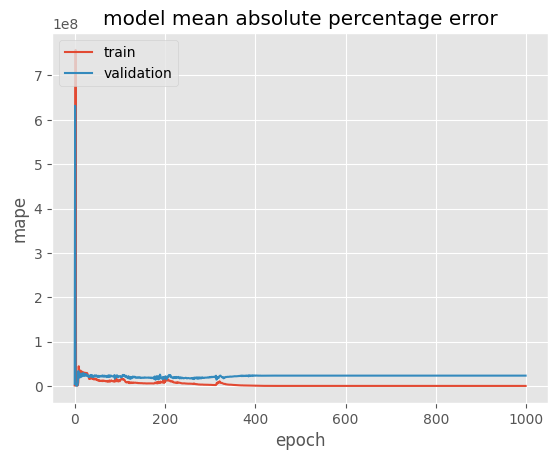

In [16]:
import matplotlib.pyplot as plt # Import plotting library
plt.figure()
plt.plot(hist.history["mean_absolute_percentage_error"])
plt.plot(hist.history["val_mean_absolute_percentage_error"])
plt.title("model mean absolute percentage error")
plt.ylabel("mape")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [17]:
encoder = Model(input_data, encoded)
encoded_data = encoder.predict(data)

1/1 [==============================] - 0s 375ms/step


In [18]:
# Crear DataFrame con los datos codificados
encoded_df = pd.DataFrame(encoded_data)

# Ver los datos codificados en una tabla
encoded_df.head(15)

# guardar la base de datos transpuesta en un archivo csv
encoded_df.to_csv('encoded_df.csv', index=False)


# librerias

In [19]:
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, cross_val_predict,LeaveOneOut, KFold
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn import tree,svm
from sklearn.svm import SVC

# LogisticRegression con Hiperparametros

In [20]:
Y5 = pd.read_csv("target.csv")
X5 = pd.read_csv("encoded_df.csv")

# Define los hiperparámetros a ajustar
param_grid5 = {'C': [0.01,0.1, 4, 5,10], 'penalty': ['l1', 'l2','l3''l4']}

# Crea un modelo de regresión logística
model5 = LogisticRegression()

# Realiza la búsqueda de hiperparámetros utilizando validación cruzada
grid_search5 = GridSearchCV(model5, param_grid5, cv=3)
grid_search5.fit(X5, Y5)



C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 4, 5, 10],
                         'penalty': ['l1', 'l2', 'l3l4']})

In [21]:

# Obtiene el mejor modelo y sus hiperparámetros
best_model5 = grid_search5.best_estimator_
best_params5 = grid_search5.best_params_

# Calcula la exactitud (accuracy) utilizando validación cruzada
accuracy_scores5 = cross_val_score(best_model5, X5, Y5, cv=3)
mean_accuracy5 = accuracy_scores5.mean()

# Realiza las predicciones con el mejor modelo
Y_pred5 = cross_val_predict(best_model5, X5, Y5, cv=3)
# Calcula el F1-score
f5 = f1_score(Y5, Y_pred5, average=None)
f5_macro = f1_score(Y5, Y_pred5, average='macro')


C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

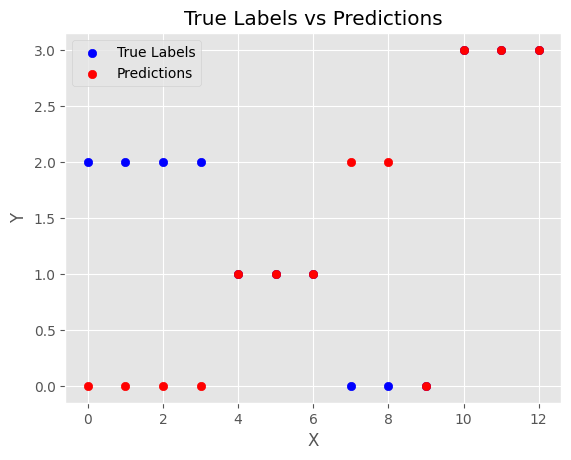

Best Parameters: {'C': 4, 'penalty': 'l2'}

Accuracy: 54.99999999999999 %
F1-score: [ 25. 100.   0. 100.] %
F1 Score (Macro): 56.25 %


In [22]:
# Grafica los resultados
plt.title('True Labels vs Predictions')
plt.scatter(range(len(Y5)), Y5, color='blue', label='True Labels')
plt.scatter(range(len(Y_pred5)), Y_pred5, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print("Best Parameters:", best_params5)
print()
print("Accuracy:", mean_accuracy5*100,"%")
print("F1-score:", f5*100,'%')
print("F1 Score (Macro):", f5_macro*100,'%')

In [23]:
# Primary human monocytes from patient with metastatic breast cancer:B1, B2, B3, B4
# Primary human monocytes from healthy control: H1,H2, H3
# Primary human monocytes from patient with gram-negative sepsis: S1,S2, S3
# Primary human monocytes from patient with tuberculosis:T1, T2, T3

# Arbol de decisiones con hiperparametros

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.metrics import classification_report

# Cargar los datos
Y3 = pd.read_csv("target.csv")
X3 = pd.read_csv("encoded_df.csv")

# Definir los hiperparámetros a ajustar
param_grid3 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 3, 4, 5]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada Leave-One-Out
loo3 = LeaveOneOut()
modelo3 = DecisionTreeClassifier(class_weight='balanced', random_state=20)
mejor_modelo3 = GridSearchCV(modelo3, param_grid3, cv=loo3)
mejor_modelo3.fit(X3, Y3)

# Obtener el mejor modelo y sus hiperparámetros
modelo_final3 = mejor_modelo3.best_estimator_
mejores_parametros3 = mejor_modelo3.best_params_



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.15, random_state=20)

# Construir y evaluar el primer modelo
modelo3.fit(X_train3, Y_train3)
Y_pred3 = modelo3.predict(X_test3)



# Construir y evaluar el segundo modelo con los mejores hiperparámetros utilizando validación cruzada Leave-One-Out
modelo3a = DecisionTreeClassifier(class_weight='balanced', **mejores_parametros3, random_state=20)
modelo3a.fit(X3, Y3)
Y_pred3a = modelo3a.predict(X3)

# Imprimir el mejor modelo y sus hiperparámetros
print("Mejor modelo 1:", modelo_final3)
print("Mejores hiperparámetros 1:", mejores_parametros3)

Mejor modelo 1: DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=20)
Mejores hiperparámetros 1: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


In [25]:
print("Informe de clasificación - Modelo 1:")
print(classification_report(Y_test3, Y_pred3))

Informe de clasificación - Modelo 1:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\57311\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\57311\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\57311\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print("Informe de clasificación - Modelo 2:")
print(classification_report(Y3, Y_pred3a))

Informe de clasificación - Modelo 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



# SVM con hiperparametros

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold

# Cargar los datos
Y1 = pd.read_csv("target.csv")
X1 = pd.read_csv("encoded_df.csv")

# Definir la estrategia de validación cruzada
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)

# Creación del modelo SVM
model1 = svm.SVC()

# Definición de los hiperparámetros a ajustar
param_grid1 = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Búsqueda de los mejores hiperparámetros utilizando GridSearchCV
grid_search1 = GridSearchCV(model1, param_grid1, cv=rskf)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.25, random_state=30, stratify=Y1)
grid_search1.fit(X_train1, Y_train1)

# Obtención del mejor modelo
best_model1 = grid_search1.best_estimator_

# Evaluación del modelo
Y_pred1 = best_model1.predict(X_test1)
classification_rep1 = classification_report(Y_test1, Y_pred1)

C:\Users\57311\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\57311\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\57311\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array wa

C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [28]:
# Imprimir el informe de clasificación
print("Best Parameters:", grid_search1.best_params_)
print()
print("Classification Report:\n", classification_rep1)


Best Parameters: {'C': 0.01, 'kernel': 'linear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.62      0.75      0.67         4
weighted avg       0.62      0.75      0.67         4



# Evaluación del Modelo SVM utilizando Leave-One-Out (LOO) y Matriz de Confusión

In [29]:
Y6 = pd.read_csv("target.csv")
X6 = pd.read_csv("encoded_df.csv")
random_state = 42  # Establece un valor fijo para random_state

# Crear el esquema de validación cruzada Leave-One-Out (LOO)
loo6 = LeaveOneOut()

# Paso 3: Creación del modelo SVM
model6 = SVC()

# Paso 4: Definición de los hiperparámetros a ajustar
param_grid6 = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Paso 5: Búsqueda de los mejores hiperparámetros utilizando GridSearchCV
grid_search6 = GridSearchCV(model6, param_grid6, cv=loo6)
grid_search6.fit(X6, Y6)

# Paso 6: Obtención del mejor modelo
best_model6 = grid_search6.best_estimator_

# Paso 7: Evaluación del modelo utilizando LOO
accuracy_loo6 = cross_val_score(best_model6, X6, Y6, cv=loo6, scoring='accuracy')
# Calcular el F1-score
f6 = f1_score(Y6, best_model6.predict(X6), average=None)
f6_macro = f1_score(Y6, best_model6.predict(X6), average='macro')


C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\57311\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


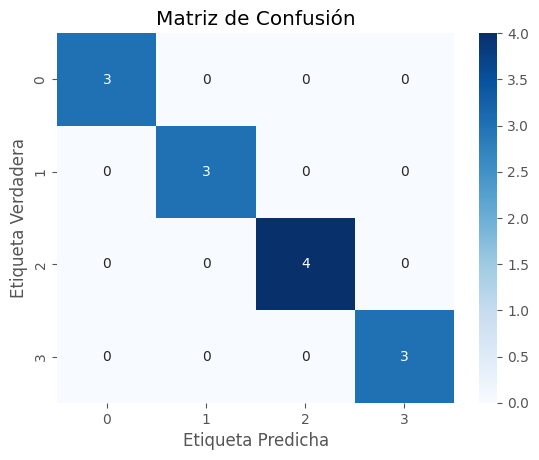

Precisión del modelo (LOO): 69.23076923076923 %
Precisión del modelo (datos completos): 100.0 %
F1-score: [1. 1. 1. 1.]
F1-score (Macro): 1.0


In [30]:
# Calcular y graficar la matriz de confusión
best_model6.fit(X6, Y6)
Y_estimado6 = best_model6.predict(X6)
confusion_mat6 = confusion_matrix(Y6, Y_estimado6)
sns.heatmap(confusion_mat6, annot=True, cmap="Blues")
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Ajustar el nuevo modelo a los datos completos
print("Precisión del modelo (LOO):", accuracy_loo6.mean()*100,'%')

accuracy_full_data = accuracy_score(Y6, Y_estimado6)
print("Precisión del modelo (datos completos):", accuracy_full_data*100,'%')
print("F1-score:", f6)
print("F1-score (Macro):", f6_macro)
